In [1]:
import os
import common

# Assign notebook and folder names
notebook_name = '03_robust_pca_range_of_lambdas'
figure_folder = os.path.join(common.FIGURE_FOLDER, notebook_name)
data_folder = os.path.join(common.DATA_FOLDER, notebook_name)

# Make the folders
! mkdir -p $figure_folder
! mkdir -p $data_folder

In [11]:
import fastcluster

[autoreload of common failed: Traceback (most recent call last):
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._boot

In [15]:
fastcluster.linkage()

<function fastcluster.linkage>

%pdb

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
input_folder = os.path.join(common.DATA_FOLDER, '001_downsample_macosko_data')

csv = os.path.join(input_folder, 'expression_table1_subset.csv')

table1 = pd.read_csv(csv, index_col=0)
print(table1.shape)
table1.head()

(300, 259)


,RHO,GNAT1,SLC24A1,PDE6B,PDC,CNGA1,RP1,SAG,NR2E3,NRL,...,SLC6A6,MAP1B,TMA7,STX3,SYT1,CRX,SNAP25,MPP4,NEUROD1,A930011O12RIK
barcode,,,,,,,,,,,,,,,,,,,,,
r1_TTCCTGCTAGGC,14,3,1,3,12,0,1,7,2,2,...,1,1,2,0,0,0,0,1,0,0
r1_TGGAGATACTCT,23,8,6,4,13,9,2,19,1,1,...,3,0,2,1,0,1,0,2,0,1
r1_CGTCTACATCCG,14,4,7,1,6,3,0,13,2,2,...,0,1,0,3,0,1,0,2,0,0
r1_CAAGCTTGGCGC,62,18,10,20,29,2,8,31,9,2,...,0,5,7,3,2,6,2,3,7,11
r1_ACTCACATAGAG,10,1,0,1,5,2,1,7,3,1,...,1,1,2,3,1,2,1,0,3,0


In [22]:
polo.optimal_leaf_ordering

In [17]:
fastcluster.linkage(table1).shape

(299, 4)

## Assign colors basd on clusters

In [5]:
cluster_identities = pd.read_table('macosko2015/retina_clusteridentities.txt', header=None,
                                   names=['barcode', 'cluster_id'], index_col=0, squeeze=True)
print(cluster_identities.shape)
cluster_identities.head()

(44808,)


barcode
r1_GGCCGCAGTCCG     2
r1_CTTGTGCGGGAA     2
r1_GCGCAACTGCTC     2
r1_GATTGGGAGGCA     2
r1_GTGCCGCCTCTC    25
Name: cluster_id, dtype: int64

In [6]:
cluster_identities_table1 = cluster_identities.loc[table1.index]
cluster_identities_table1.head()

barcode
r1_TTCCTGCTAGGC    24
r1_TGGAGATACTCT    24
r1_CGTCTACATCCG    24
r1_CAAGCTTGGCGC    24
r1_ACTCACATAGAG    24
Name: cluster_id, dtype: int64

In [7]:
cluster_ids = cluster_identities_table1.unique()
colors = sns.color_palette(palette='Set2', n_colors=len(cluster_ids))
id_to_color = dict(zip(cluster_ids, colors))

color_labels = [id_to_color[i] for i in cluster_identities_table1]
color_labels[:4]

[(0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.40000000000000002, 0.76078431372549016, 0.6470588235294118),
 (0.40000000000000002, 0.76078431372549016, 0.6470588235294118)]

## Add Robust PCA implementations to path

In [9]:
import sys

sys.path.extend(['/Users/olgabot/code/robust-pca/', '/Users/olgabot/code/rpcaADMM/'])

import r_pca
import rpcaADMM

## Try a range of lambdas

In [30]:
def tidifier(data, col, group):
    tidy = data.unstack().reset_index()
    tidy[col] = group
    return tidy

--- lambda0.05 ---
iteration: 1, error: 50067.543549042806
iteration: 100, error: 0.30573021318292753
iteration: 171, error: 0.08985817248014913


/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


--- lambda0.10 ---
iteration: 1, error: 80253.26743362723
iteration: 100, error: 1.2508397932982538
iteration: 200, error: 0.18769231399649933
iteration: 264, error: 0.08979153760256717
--- lambda0.15 ---
iteration: 1, error: 94153.40140880892
iteration: 100, error: 0.9948349445930695
iteration: 185, error: 0.08969318133426293
--- lambda0.20 ---
iteration: 1, error: 101029.29251580665
iteration: 100, error: 0.7228717281539795
iteration: 181, error: 0.08921286755689073
--- lambda0.25 ---
iteration: 1, error: 104625.88510737955
iteration: 100, error: 0.6709327674425578
iteration: 155, error: 0.07459160763974824
--- lambda0.30 ---
iteration: 1, error: 106777.33878572722
iteration: 100, error: 0.7618599305732805
iteration: 149, error: 0.0858398585038977


/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


CPU times: user 10min 15s, sys: 4.96 s, total: 10min 20s
Wall time: 9min 20s


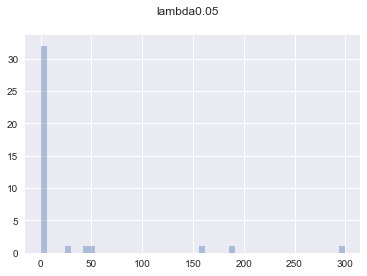

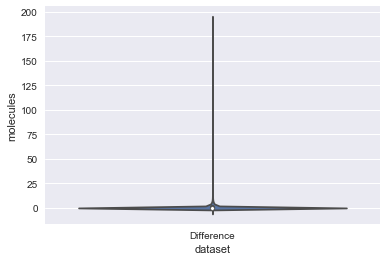

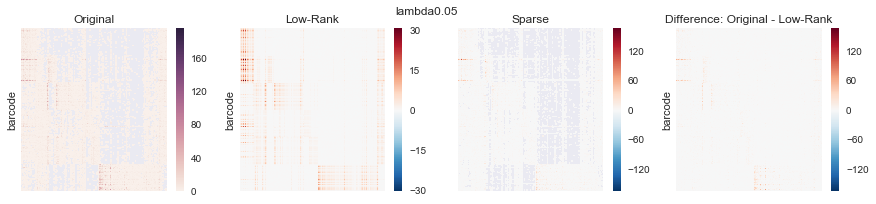

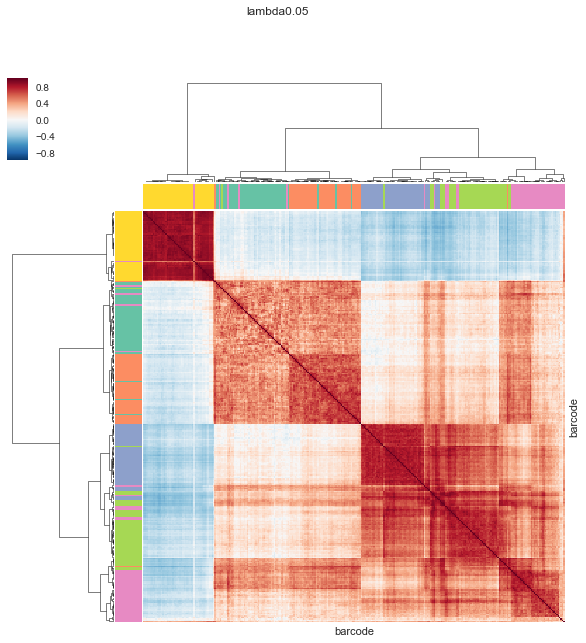

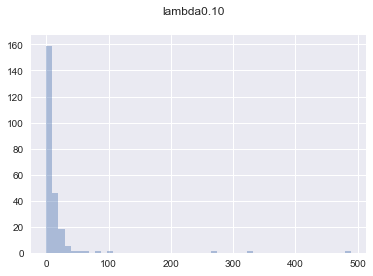

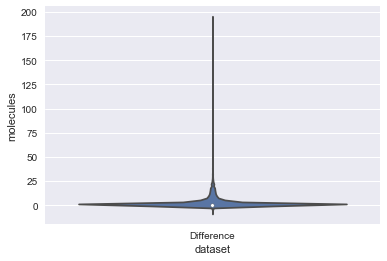

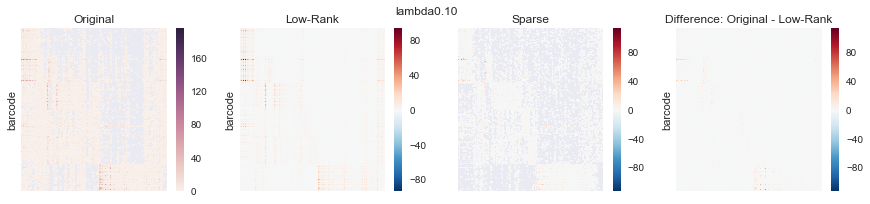

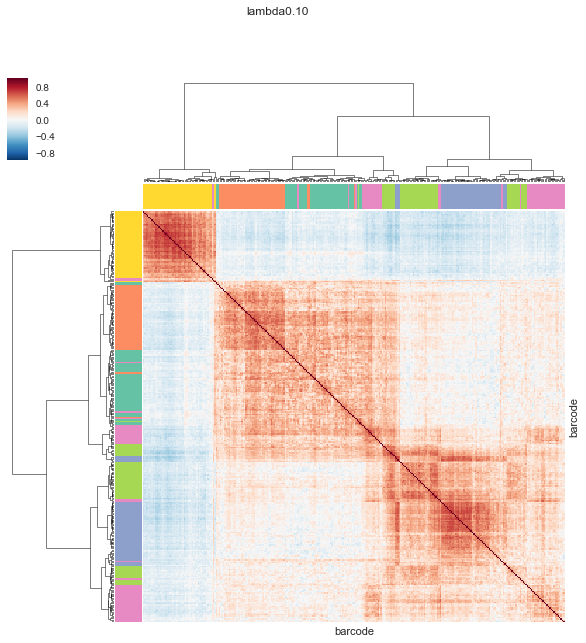

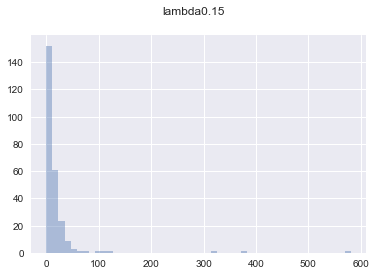

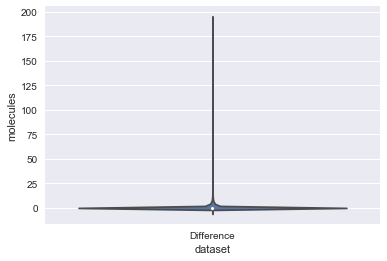

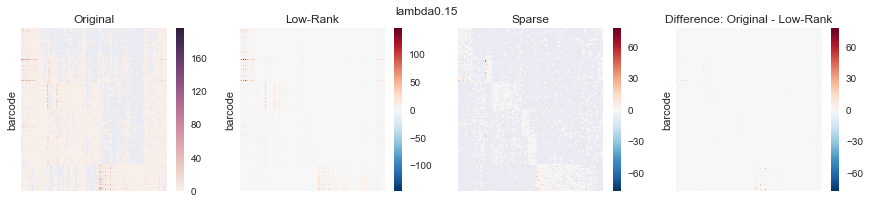

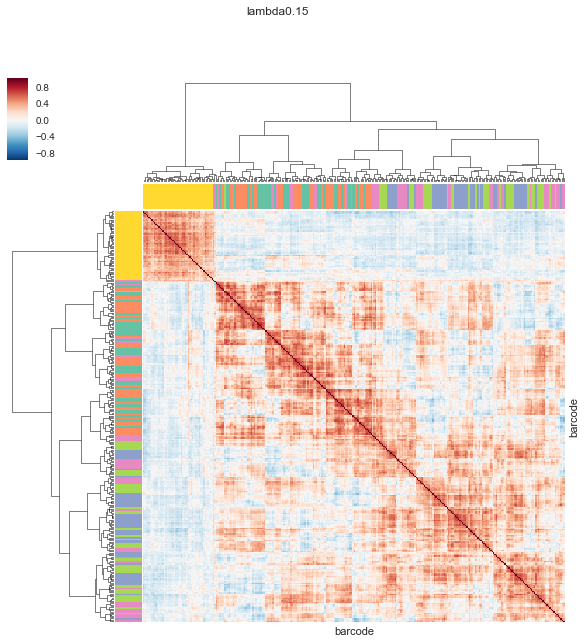

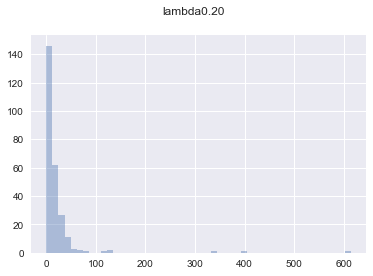

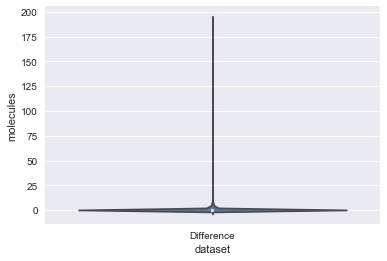

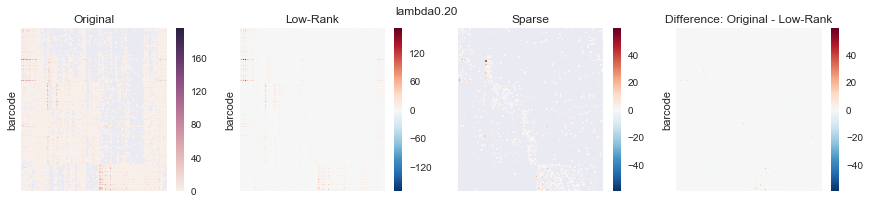

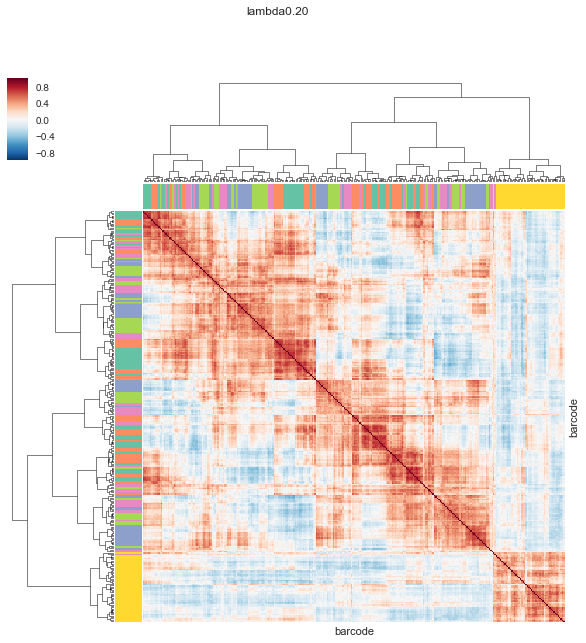

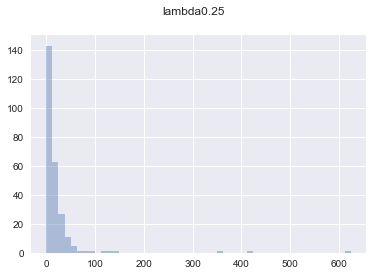

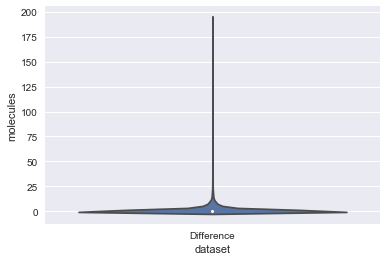

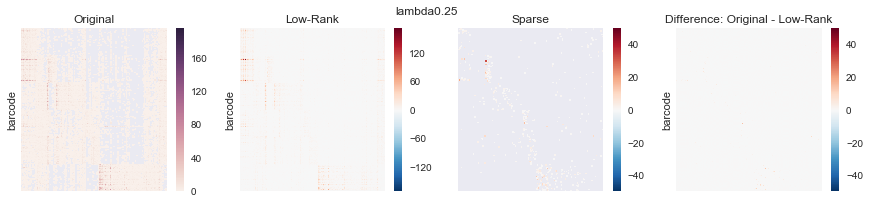

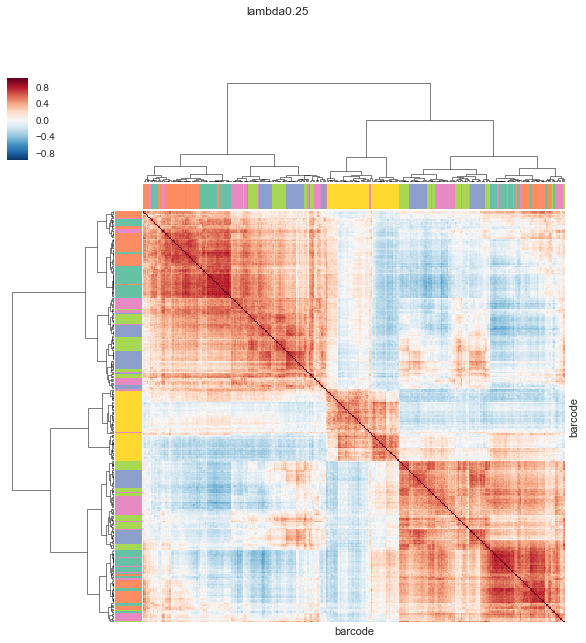

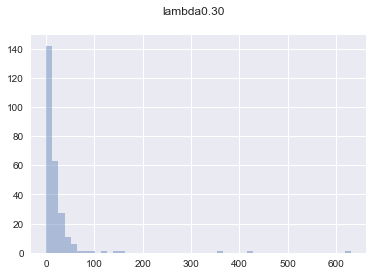

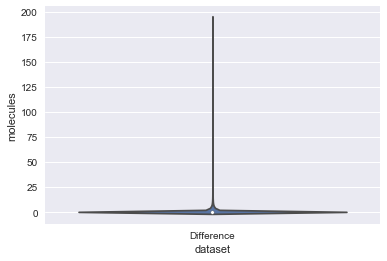

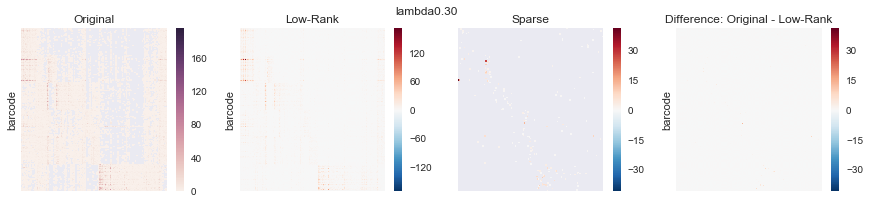

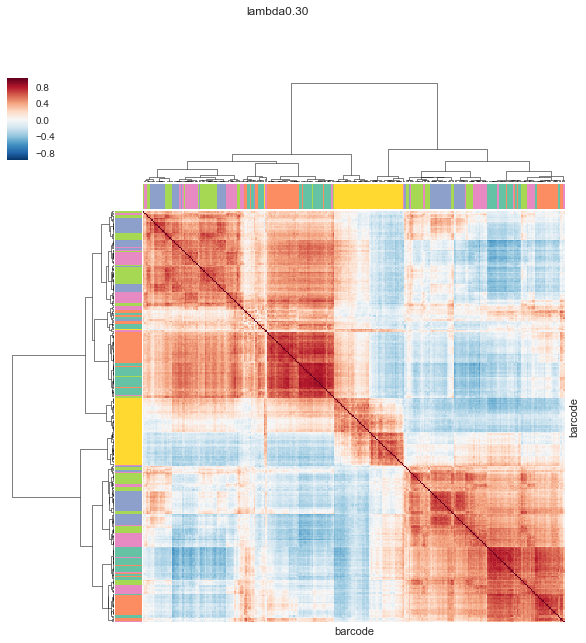

In [31]:
%%time

lmbdas = np.arange(0.05, 0.35, 0.05)

rpcas = {}

for lmbda in lmbdas:
    prefix = 'lambda{:.2f}'.format(lmbda)
    print('--- {} ---'.format(prefix))
    
    rpca = r_pca.R_pca(table1.as_matrix(), lmbda=lmbda)
    rpca.fit()
    rpcas[lmbda] = rpca
    
    U, s, V = np.linalg.svd(rpca.L)
    
    if (s == 0).all():
        continue
    
    fig, ax = plt.subplots()
    sns.distplot(s[s > 1e-2], kde=False)
    fig.savefig(os.path.join(figure_folder, '{}_low_rank_singular_values_distplot.pdf'.format(
        prefix)))
    fig.suptitle(prefix)
    
    L = pd.DataFrame(rpca.L, index=table1.index, columns=table1.columns)
    
    diff = table1 - L
    datasets = {'Original': table1, 'Low-Rank': L, 'Sparse': rpca.S, 
            'Difference: Original - Low-Rank': diff}
    
    diff_tidy = tidifier(diff, 'dataset', 'Difference')
    table1_tidy = tidifier(table1, 'dataset', 'Difference')
    L_tidy = tidifier(L, 'dataset', 'Difference')

    tidy = pd.concat([table1_tidy, L_tidy, diff_tidy])
    tidy = tidy.rename(columns={0: 'molecules'})

    fig, ax = plt.subplots()
    sns.violinplot(x='dataset', y='molecules', data=tidy)
    fig.savefig(os.path.join(figure_folder, '{}_magnitude_violinplots.pdf'))

    common.heatmaps(datasets)
    fig = plt.gcf()
    fig.suptitle(prefix)
    fig.savefig(os.path.join(figure_folder, '{}_matrix_heatmaps.pdf'.format(prefix)))
    
    data = L.T.corr(method='spearman')
    g_rpca = common.clustermap(data, col_colors=color_labels, row_colors=color_labels)
    g_rpca.fig.suptitle(prefix)
    g_rpca.savefig(os.path.join(figure_folder, '{}_clustermap.pdf'.format(prefix)))

## ADMM implementation

In [36]:
reduced = rpcaADMM.rpcaADMM(table1)
# print(reduced.shape)
# reduced.head()


iter	    r norm	   eps pri	    s norm	  eps dual	 objective
   1	  386.9989	    5.6518	  560.3478	    5.5259	  46003.39
  10	  126.6648	    7.4377	   57.8995	    7.7838	 274951.69
  20	   19.5261	    7.9579	   26.0279	    7.5066	 297640.42
  30	   10.9950	    8.0745	   10.9821	    7.3901	 300438.68


In [62]:
rpcaADMM.rpcaADMM()

In [38]:
reduced.keys()

dict_keys(['objval', 'r_norm', 's_norm', 'eps_pri', 'eps_dual', 'addm_toc', 'admm_iter', 'X1_admm', 'X2_admm', 'X3_admm'])

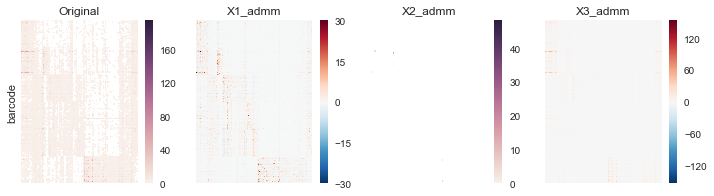

In [76]:
ncols = 4
nrows = 1

axsize = 3

width = ncols * axsize
height = nrows * axsize

fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
axes_iter = axes.flat

x_keys = [key for key in reduced if key.startswith('X')]

ax = next(axes_iter)
data = table1
mask = data == 0
sns.heatmap(table1, mask=mask, ax=ax, xticklabels=[], yticklabels=[])
ax.set(title='Original')

for ax, key in zip(axes_iter, x_keys):
    data = reduced[key]
    mask = data == 0
    
    vmin = data.min().min()
    vmax = data.max().max()
    center = 0
    sns.heatmap(reduced[key], mask=mask, ax=ax, xticklabels=[], yticklabels=[])
    ax.set(title=key)
    


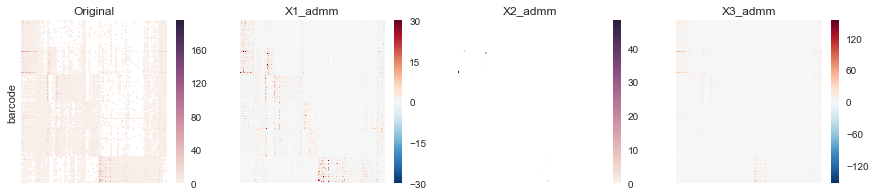

In [79]:
ncols = 4
nrows = 1

axsize = 3

width = ncols * axsize * 1.25
height = nrows * axsize

fig, axes = plt.subplots(ncols=ncols, figsize=(width, height))
axes_iter = axes.flat

x_keys = [key for key in reduced if key.startswith('X')]

ax = next(axes_iter)
common.heatmap(table1, ax=ax)
ax.set(title='Original')

for ax, key in zip(axes_iter, x_keys):
    common.heatmap(reduced[key], ax=ax)
    ax.set(title=key)
    


In [55]:
U, s, V = np.linalg.svd(reduced['X3_admm'])

In [61]:
reduced['X2_admm'][reduced['X2_admm'].nonzero()]

array([  0.06196856,   6.6911438 ,  13.40747184,   0.27285075,
        48.22056903,   2.24481196,   2.75026673,   0.05984601,   6.10384102])

In [80]:
ax

[autoreload of common failed: Traceback (most recent call last):
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/olgabot/anaconda3/envs/cshl-sca-2017/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._boot

In [81]:
sns.heatmap??